In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
#Load data
ask_15m = pd.read_csv('ETHUSD_Candlestick_15_M_ASK_01.01.2024-31.01.2024.csv')
bid_15m = pd.read_csv('ETHUSD_Candlestick_15_M_BID_01.01.2024-31.01.2024.csv')

In [3]:
#print Ask data
print(ask_15m.head(5))
print(ask_15m.tail(5))

                         Local time  Open  High   Low  Close   Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2349  2338   2344  210.723
1  01.01.2024 21:15:00.000 GMT-0000  2344  2345  2341   2341  160.854
2  01.01.2024 21:30:00.000 GMT-0000  2341  2342  2337   2337  188.685
3  01.01.2024 21:45:00.000 GMT-0000  2337  2341  2336   2340  120.066
4  01.01.2024 22:00:00.000 GMT-0000  2340  2343  2336   2336    3.344
                            Local time  Open  High   Low  Close  Volume
2886  31.01.2024 22:45:00.000 GMT-0000  2284  2290  2283   2287  18.768
2887  31.01.2024 23:00:00.000 GMT-0000  2287  2290  2284   2284  41.587
2888  31.01.2024 23:15:00.000 GMT-0000  2284  2290  2284   2290  48.098
2889  31.01.2024 23:30:00.000 GMT-0000  2290  2290  2287   2288  21.552
2890  31.01.2024 23:45:00.000 GMT-0000  2288  2289  2285   2285  23.188


In [4]:
#print Bid data
print(bid_15m.head(5))
print(bid_15m.tail(5))

                         Local time  Open  High   Low  Close   Volume
0  01.01.2024 21:00:00.000 GMT-0000  2338  2343  2336   2338  204.438
1  01.01.2024 21:15:00.000 GMT-0000  2338  2338  2334   2335  180.783
2  01.01.2024 21:30:00.000 GMT-0000  2335  2335  2331   2331  229.140
3  01.01.2024 21:45:00.000 GMT-0000  2331  2334  2330   2334  134.205
4  01.01.2024 22:00:00.000 GMT-0000  2335  2337  2330   2330    6.344
                            Local time  Open  High   Low  Close   Volume
2886  31.01.2024 22:45:00.000 GMT-0000  2279  2285  2278   2283  317.244
2887  31.01.2024 23:00:00.000 GMT-0000  2283  2285  2279   2279  513.474
2888  31.01.2024 23:15:00.000 GMT-0000  2280  2285  2279   2285  270.861
2889  31.01.2024 23:30:00.000 GMT-0000  2285  2286  2282   2283  161.040
2890  31.01.2024 23:45:00.000 GMT-0000  2283  2284  2280   2281  278.214


In [5]:
#merge Ask and Bid Data
data = pd.merge(bid_15m, ask_15m, on='Local time', how='outer', suffixes=('_bid', '_ask'))
data

,Local time,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2336,2338,204.438,2338,2349,2338,2344,210.723
1,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2334,2335,180.783,2344,2345,2341,2341,160.854
2,01.01.2024 21:30:00.000 GMT-0000,2335,2335,2331,2331,229.140,2341,2342,2337,2337,188.685
3,01.01.2024 21:45:00.000 GMT-0000,2331,2334,2330,2334,134.205,2337,2341,2336,2340,120.066
4,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2330,2330,6.344,2340,2343,2336,2336,3.344
...,...,...,...,...,...,...,...,...,...,...,...
2886,31.01.2024 22:45:00.000 GMT-0000,2279,2285,2278,2283,317.244,2284,2290,2283,2287,18.768
2887,31.01.2024 23:00:00.000 GMT-0000,2283,2285,2279,2279,513.474,2287,2290,2284,2284,41.587
2888,31.01.2024 23:15:00.000 GMT-0000,2280,2285,2279,2285,270.861,2284,2290,2284,2290,48.098
2889,31.01.2024 23:30:00.000 GMT-0000,2285,2286,2282,2283,161.040,2290,2290,2287,2288,21.552


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Local time  2891 non-null   object 
 1   Open_bid    2891 non-null   int64  
 2   High_bid    2891 non-null   int64  
 3   Low_bid     2891 non-null   int64  
 4   Close_bid   2891 non-null   int64  
 5   Volume_bid  2891 non-null   float64
 6   Open_ask    2891 non-null   int64  
 7   High_ask    2891 non-null   int64  
 8   Low_ask     2891 non-null   int64  
 9   Close_ask   2891 non-null   int64  
 10  Volume_ask  2891 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 248.6+ KB


In [7]:
#Drop Null values
data.dropna(inplace=True)

In [8]:
#rename columns

data.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

In [9]:
#Check merged data
data.head(5)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2336,2338,204.438,2338,2349,2338,2344,210.723
1,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2334,2335,180.783,2344,2345,2341,2341,160.854
2,01.01.2024 21:30:00.000 GMT-0000,2335,2335,2331,2331,229.140,2341,2342,2337,2337,188.685
3,01.01.2024 21:45:00.000 GMT-0000,2331,2334,2330,2334,134.205,2337,2341,2336,2340,120.066
4,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2330,2330,6.344,2340,2343,2336,2336,3.344


In [10]:
#Delta of trading volumes for the merged data
data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [11]:
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"]= data["Close_Ask"] - data["Close_Bid"]

In [12]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,2372.668281,2377.149775,2367.783812,2372.617433,527.708864,2378.092356,2382.611207,2373.286406,2378.065029,106.496300,-421.212563,431.774061,5.424075,5.461432,5.502594,5.447596
std,132.803053,133.433607,132.257395,132.844537,418.518414,132.683835,133.281401,132.099720,132.678154,182.056277,439.941876,429.577608,1.122294,1.145844,1.188866,1.129168
min,2174.000000,2182.000000,2102.000000,2173.000000,2.463000,2179.000000,2188.000000,2109.000000,2179.000000,2.559000,-1853.216000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2250.000000,2254.000000,2246.000000,2250.000000,194.430000,2256.000000,2260.000000,2252.000000,2256.000000,26.169000,-768.009500,38.502000,5.000000,5.000000,5.000000,5.000000
50%,2338.000000,2343.000000,2335.000000,2338.000000,384.504000,2343.000000,2348.000000,2340.000000,2343.000000,42.564000,-288.809000,290.287000,5.000000,5.000000,5.000000,5.000000
75%,2503.000000,2508.000000,2495.500000,2503.000000,849.295500,2508.000000,2513.000000,2501.500000,2508.000000,90.720000,-17.729500,768.009500,6.000000,6.000000,6.000000,6.000000
max,2707.000000,2715.000000,2689.000000,2707.000000,1934.166000,2712.000000,2720.000000,2694.000000,2712.000000,2031.120000,570.660000,1853.216000,9.000000,9.000000,18.000000,9.000000


In [13]:
data.shape

(2891, 17)

In [14]:
data.head()

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,01.01.2024 21:00:00.000 GMT-0000,2338,2343,2336,2338,204.438,2338,2349,2338,2344,210.723,6.285,6.285,0,6,2,6
1,01.01.2024 21:15:00.000 GMT-0000,2338,2338,2334,2335,180.783,2344,2345,2341,2341,160.854,-19.929,19.929,6,7,7,6
2,01.01.2024 21:30:00.000 GMT-0000,2335,2335,2331,2331,229.140,2341,2342,2337,2337,188.685,-40.455,40.455,6,7,6,6
3,01.01.2024 21:45:00.000 GMT-0000,2331,2334,2330,2334,134.205,2337,2341,2336,2340,120.066,-14.139,14.139,6,7,6,6
4,01.01.2024 22:00:00.000 GMT-0000,2335,2337,2330,2330,6.344,2340,2343,2336,2336,3.344,-3.000,3.000,5,6,6,6


In [15]:
import datetime

In [16]:
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

In [17]:
#data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True, format='mixed', dayfirst=True)
data['Local time cleaned'] = data['Local time'].str.extract(r'^(.*)\sGMT')[0]
data['Local_time_T'] = pd.to_datetime(data['Local time cleaned'], dayfirst=True)

In [18]:
#Drop Local time
data=data.drop(['Local time'],axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open_Bid            2891 non-null   int64         
 1   High_Bid            2891 non-null   int64         
 2   Low_Bid             2891 non-null   int64         
 3   Close_Bid           2891 non-null   int64         
 4   Volume_Bid          2891 non-null   float64       
 5   Open_Ask            2891 non-null   int64         
 6   High_Ask            2891 non-null   int64         
 7   Low_Ask             2891 non-null   int64         
 8   Close_Ask           2891 non-null   int64         
 9   Volume_Ask          2891 non-null   float64       
 10  Volume_Delta        2891 non-null   float64       
 11  Volume_Delta_abs    2891 non-null   float64       
 12  Open_Delta          2891 non-null   int64         
 13  High_Delta          2891 non-null   int64       

<Figure size 900x400 with 0 Axes>

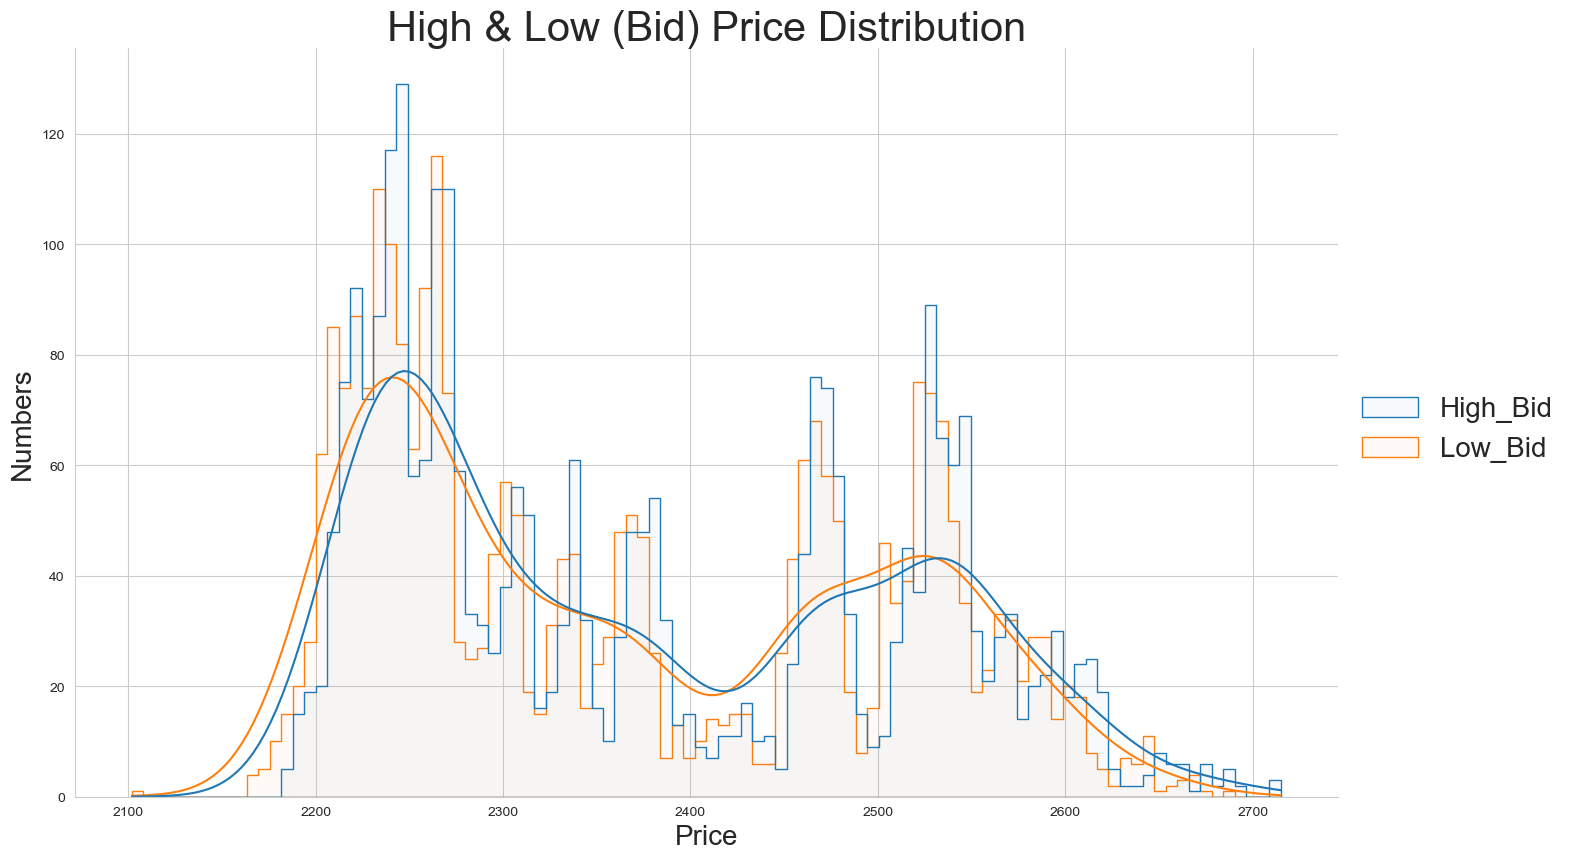

In [20]:
#Ask and Bid Price Distribution
import seaborn as sns

fig = plt.figure(figsize=(9, 4))
plt.rc('axes', titlesize= 30 )
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0})

sns.displot(
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species",
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,

)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show();

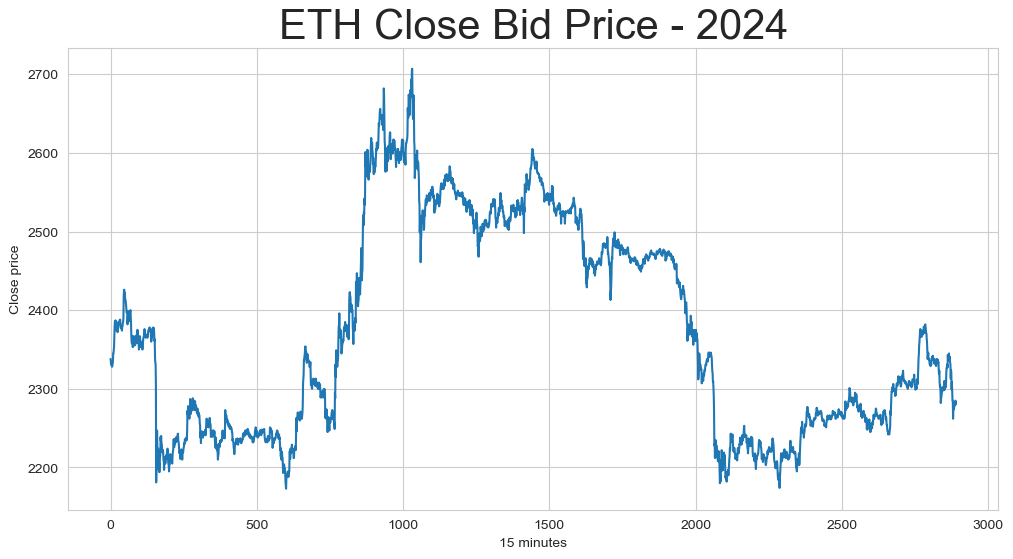

In [21]:
#visualise Close Bid Price
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('ETH Close Bid Price - 2024')
plt.xlabel('15 minutes')
plt.ylabel('Close price')
plt.show()

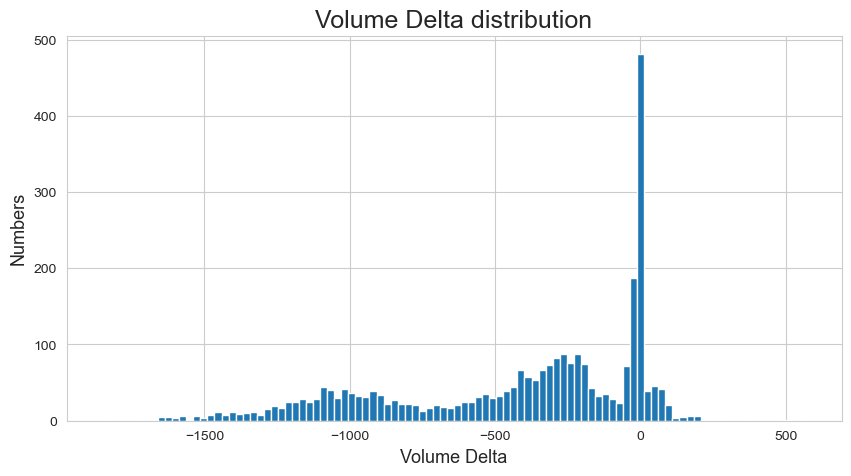

In [22]:
#visualise Volume Delta
plt.figure(num=1,figsize=(10,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta',size=13)
plt.show();

In [23]:
#confirm the merged data
print("Merged DataFrame columns:", data.columns)

Merged DataFrame columns: Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T'],
      dtype='object')


In [24]:
#Create additional features 
data['Spread'] = data['Close_Ask'] - data['Close_Bid']
data['Mid_Price'] = (data['Close_Ask'] + data['Close_Bid']) / 2
data['Price_Change'] = (data['Close_Bid'] - data['Open_Bid']) / data['Open_Bid']

In [25]:
#Scale the price data (dividing by 1000)
price_cols_ask = ['Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask']
price_cols_bid = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid']

data[price_cols_ask] = data[price_cols_ask] / 1000
data[price_cols_bid] = data[price_cols_bid] / 1000

In [26]:
#Define volume features
data['Volume_Delta'] = data['Volume_Ask'] - data['Volume_Bid']
data['Volume_Delta_abs'] = data['Volume_Delta'].abs()
data['Open_Delta'] = data['Open_Ask'] - data['Open_Bid']
data['High_Delta'] = data['High_Ask'] - data['High_Bid']
data['Low_Delta'] = data['Low_Ask'] - data['Low_Bid']
data['Close_Delta'] = data['Close_Ask'] - data['Close_Bid']

In [27]:
#add ASK and Bid values for time step
data['Y_High_Bid'] = data['High_Bid'].shift(-1)
data['Y_Low_Ask'] = data['Low_Ask'].shift(-1)

In [28]:
#Check for missing values 
data.dropna(inplace=True)

In [29]:
#labels for classification
data['Label_Ask'] = (data['Close_Ask'].shift(-1) > data['Close_Ask']).astype(int)
data['Label_Bid'] = (data['Close_Bid'].shift(-1) > data['Close_Bid']).astype(int)

In [30]:
#Normalize volume data
volume_cols = ['Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta', 
               'Low_Delta', 'Close_Delta', 'Y_High_Bid', 'Y_Low_Ask']s

In [31]:
#Normalize 
scaler = MinMaxScaler()
data[volume_cols] = scaler.fit_transform(data[volume_cols])

In [32]:
#scaling and normalization
print("Scaled and Normalized Merged Dataset:")
print(data.head())

Scaled and Normalized Merged Dataset:
   Open_Bid  High_Bid  Low_Bid  Close_Bid  Volume_Bid  Open_Ask  High_Ask  \
0     2.338     2.343    2.336      2.338    0.104558     2.338     2.349   
1     2.338     2.338    2.334      2.335    0.092312     2.344     2.345   
2     2.335     2.335    2.331      2.331    0.117346     2.341     2.342   
3     2.331     2.334    2.330      2.334    0.068200     2.337     2.341   
4     2.335     2.337    2.330      2.330    0.002009     2.340     2.343   

   Low_Ask  Close_Ask  Volume_Ask  ...  Close_Delta       Local time cleaned  \
0    2.338      2.344    0.102617  ...     0.666667  01.01.2024 21:00:00.000   
1    2.341      2.341    0.078033  ...     0.666667  01.01.2024 21:15:00.000   
2    2.337      2.337    0.091753  ...     0.666667  01.01.2024 21:30:00.000   
3    2.336      2.340    0.057926  ...     0.666667  01.01.2024 21:45:00.000   
4    2.336      2.336    0.000387  ...     0.666667  01.01.2024 22:00:00.000   

         Local_tim

In [33]:
#Candlestick Pattern detection
import numpy as np

def bullish_engulfing(data):
    return (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid']) & (data['Open_Bid'] < data['Close_Bid'].shift(1))

def bearish_engulfing(data):
    return (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid']) & (data['Open_Bid'] > data['Close_Bid'].shift(1))

def morning_star(data):
    return (data['Close_Bid'].shift(2) < data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) < data['Open_Bid'].shift(1)) & (data['Close_Bid'] > data['Open_Bid'])

def evening_star(data):
    return (data['Close_Bid'].shift(2) > data['Open_Bid'].shift(2)) & (data['Close_Bid'].shift(1) > data['Open_Bid'].shift(1)) & (data['Close_Bid'] < data['Open_Bid'])

def hammer(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (lower_shadow >= 2 * body)

def shooting_star(data):
    body = np.abs(data['Close_Bid'] - data['Open_Bid'])
    upper_shadow = data['High_Bid'] - np.maximum(data['Close_Bid'], data['Open_Bid'])
    lower_shadow = np.minimum(data['Close_Bid'], data['Open_Bid']) - data['Low_Bid']
    return (body <= 0.3 * (data['High_Bid'] - data['Low_Bid'])) & (upper_shadow >= 2 * body)

In [34]:
#add patterns to dataframe
data['bullish_engulfing'] = bullish_engulfing(data).astype(int)
data['bearish_engulfing'] = bearish_engulfing(data).astype(int)
data['morning_star'] = morning_star(data).astype(int)
data['evening_star'] = evening_star(data).astype(int)
data['hammer'] = hammer(data).astype(int)
data['shooting_star'] = shooting_star(data).astype(int)

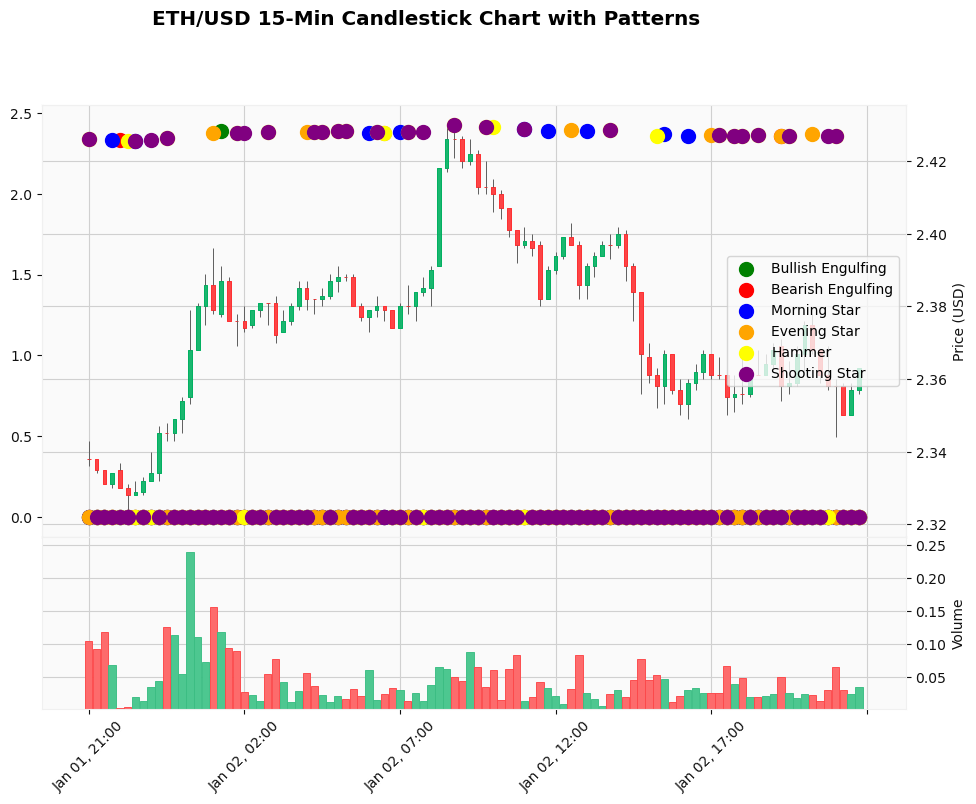

In [35]:
#Visualise Candlestick patterns
df_plot = data.iloc[:100].copy()
df_plot.set_index('Local_time_T', inplace=True)

addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='o', color='green', label='Bullish Engulfing'))
if 'bearish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bearish_engulfing'], type='scatter', markersize=100, marker='o', color='red', label='Bearish Engulfing'))
if 'morning_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['morning_star'], type='scatter', markersize=100, marker='o', color='blue', label='Morning Star'))
if 'evening_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['evening_star'], type='scatter', markersize=100, marker='o', color='orange', label='Evening Star'))
if 'hammer' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['hammer'], type='scatter', markersize=100, marker='o', color='yellow', label='Hammer'))
if 'shooting_star' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['shooting_star'], type='scatter', markersize=100, marker='o', color='purple', label='Shooting Star'))

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume' 
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 15-Min Candlestick Chart with Patterns',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)

plt.show()

In [36]:
#1 day period for 1st January 2024
data['Local_time_T'] = pd.to_datetime(data['Local_time_T'], utc=True)

start_date = pd.to_datetime('2024-01-01 00:00:00+00:00', utc=True)
end_date = pd.to_datetime('2024-01-01 23:55:00+00:00', utc=True)
df_day = data[(data['Local_time_T'] >= start_date) & (data['Local_time_T'] <= end_date)].copy()

print("Jan 1, 2024 (checking bullish_engulfing):")
print(df_day[['Local_time_T', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'bullish_engulfing']].head(10))

Jan 1, 2024 (checking bullish_engulfing):
               Local_time_T  Open_Bid  High_Bid  Low_Bid  Close_Bid  \
0 2024-01-01 21:00:00+00:00     2.338     2.343    2.336      2.338   
1 2024-01-01 21:15:00+00:00     2.338     2.338    2.334      2.335   
2 2024-01-01 21:30:00+00:00     2.335     2.335    2.331      2.331   
3 2024-01-01 21:45:00+00:00     2.331     2.334    2.330      2.334   
4 2024-01-01 22:00:00+00:00     2.335     2.337    2.330      2.330   
5 2024-01-01 22:15:00+00:00     2.330     2.331    2.322      2.328   
6 2024-01-01 22:30:00+00:00     2.328     2.332    2.328      2.329   
7 2024-01-01 22:45:00+00:00     2.329     2.333    2.328      2.332   
8 2024-01-01 23:00:00+00:00     2.332     2.340    2.332      2.334   
9 2024-01-01 23:15:00+00:00     2.334     2.347    2.332      2.345   

   bullish_engulfing  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6              

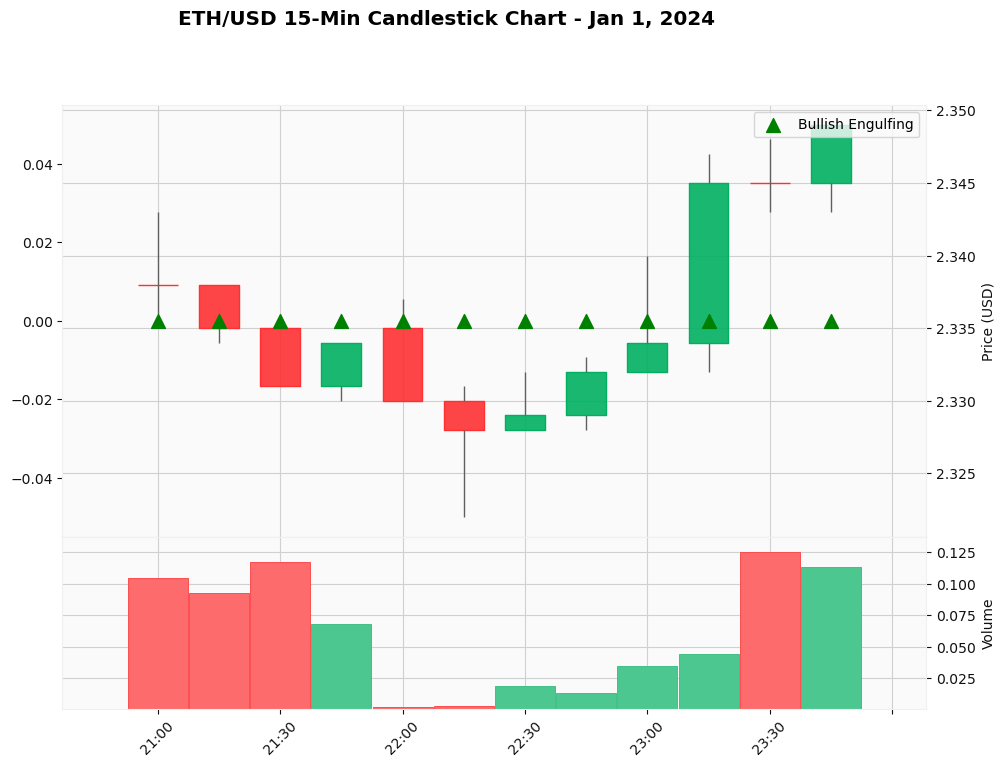

In [37]:
#Visualise for 1st jan bullish engulfing
df_plot = df_day.set_index('Local_time_T') 
addplots = []
if 'bullish_engulfing' in df_plot.columns:
    addplots.append(mpf.make_addplot(df_plot['Close_Bid'] * df_plot['bullish_engulfing'], type='scatter', markersize=100, marker='^', color='green', label='Bullish Engulfing'))
df_plot.columns = df_plot.columns.str.strip()

df_plot = df_plot.rename(columns={
    'Open_Bid': 'Open',
    'High_Bid': 'High',
    'Low_Bid': 'Low',
    'Close_Bid': 'Close',
    'Volume_Bid': 'Volume'
})

mpf.plot(
    df_plot,
    type='candle',
    style='yahoo',
    title='ETH/USD 15-Min Candlestick Chart - Jan 1, 2024',
    ylabel='Price (USD)',
    volume=True,
    addplot=addplots,
    figscale=1.5,
    show_nontrading=False
)
plt.show()

In [41]:
#pattern detection in dataframe
print(data[['Local_time_T', 'bullish_engulfing', 'bearish_engulfing', 'morning_star', 'evening_star', 'hammer', 'shooting_star']].head())

               Local_time_T  bullish_engulfing  bearish_engulfing  \
0 2024-01-01 21:00:00+00:00                  0                  0   
1 2024-01-01 21:15:00+00:00                  0                  0   
2 2024-01-01 21:30:00+00:00                  0                  0   
3 2024-01-01 21:45:00+00:00                  0                  0   
4 2024-01-01 22:00:00+00:00                  0                  1   

   morning_star  evening_star  hammer  shooting_star  
0             0             0       1              1  
1             0             0       0              0  
2             0             0       0              0  
3             1             0       0              0  
4             0             0       0              0  


In [42]:
#extract the date from formatted timestamp
data["Local_time_T"] = pd.to_datetime(data["Local_time_T"])
data["date"] = data["Local_time_T"].dt.date

In [43]:
#Technical Indicators
#Moving Averages
data['MA_10'] = data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
data['MA_20'] = data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
data['MA_50'] = data['Close_Bid'].rolling(window=50, min_periods=1).mean().round(2)

data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,...,bullish_engulfing,bearish_engulfing,morning_star,evening_star,hammer,shooting_star,date,MA_10,MA_20,MA_50
0,2.338,2.343,2.336,2.338,0.104558,2.338,2.349,2.338,2.344,0.102617,...,0,0,0,0,1,1,2024-01-01,2.34,2.34,2.34
1,2.338,2.338,2.334,2.335,0.092312,2.344,2.345,2.341,2.341,0.078033,...,0,0,0,0,0,0,2024-01-01,2.34,2.34,2.34
2,2.335,2.335,2.331,2.331,0.117346,2.341,2.342,2.337,2.337,0.091753,...,0,0,0,0,0,0,2024-01-01,2.33,2.33,2.33
3,2.331,2.334,2.330,2.334,0.068200,2.337,2.341,2.336,2.340,0.057926,...,0,0,1,0,0,0,2024-01-01,2.33,2.33,2.33
4,2.335,2.337,2.330,2.330,0.002009,2.340,2.343,2.336,2.336,0.000387,...,0,1,0,0,0,0,2024-01-01,2.33,2.33,2.33


In [44]:
print(data.columns)

Index(['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
       'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
       'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
       'Low_Delta', 'Close_Delta', 'Local time cleaned', 'Local_time_T',
       'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
       'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
       'morning_star', 'evening_star', 'hammer', 'shooting_star', 'date',
       'MA_10', 'MA_20', 'MA_50'],
      dtype='object')


In [45]:
#Percentage Change for Volatility 
data['Pct_Change_15min'] = data['Close_Bid'].pct_change(15).abs()

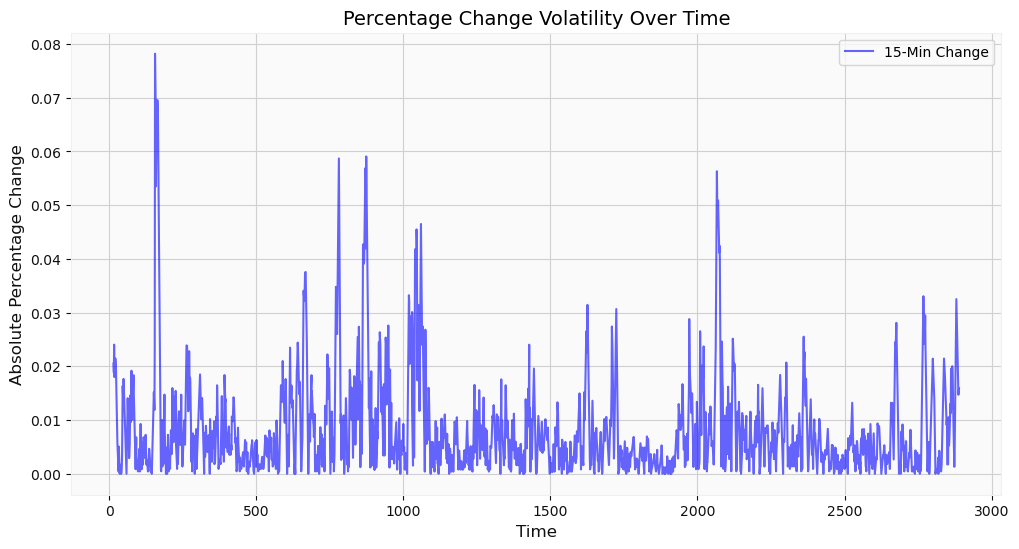

In [46]:
#Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Pct_Change_15min'], label='15-Min Change', color='blue', alpha=0.6)
plt.title("Percentage Change Volatility Over Time", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Absolute Percentage Change", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Average True Range
data['ATR'] = data['Open_Bid'].rolling(window=14).max() - data['Close_Bid'].rolling(window=14).min()

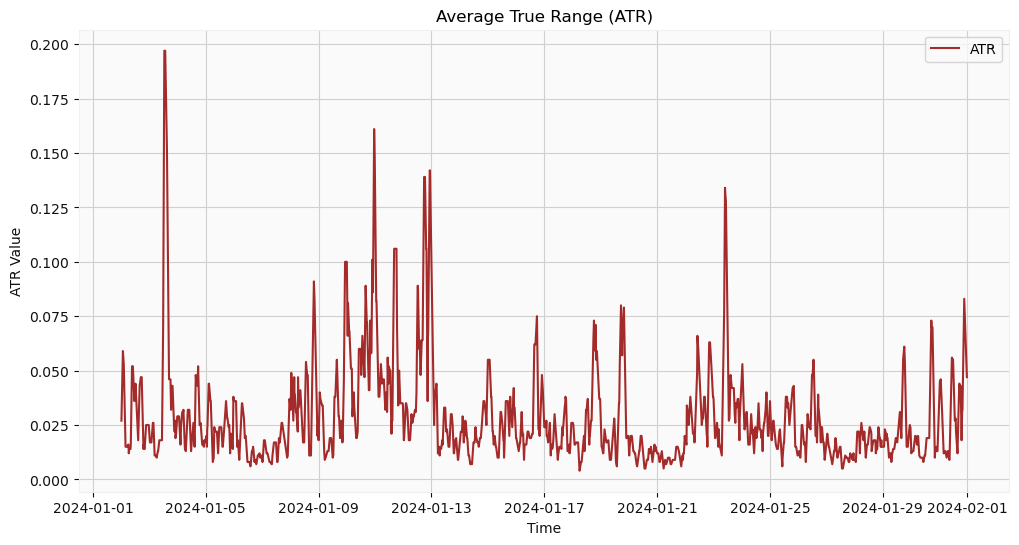

In [48]:
#Plot Average True Range
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['ATR'], label='ATR', color='brown')
plt.title('Average True Range (ATR)')
plt.xlabel('Time')
plt.ylabel('ATR Value')
plt.legend()
plt.show()

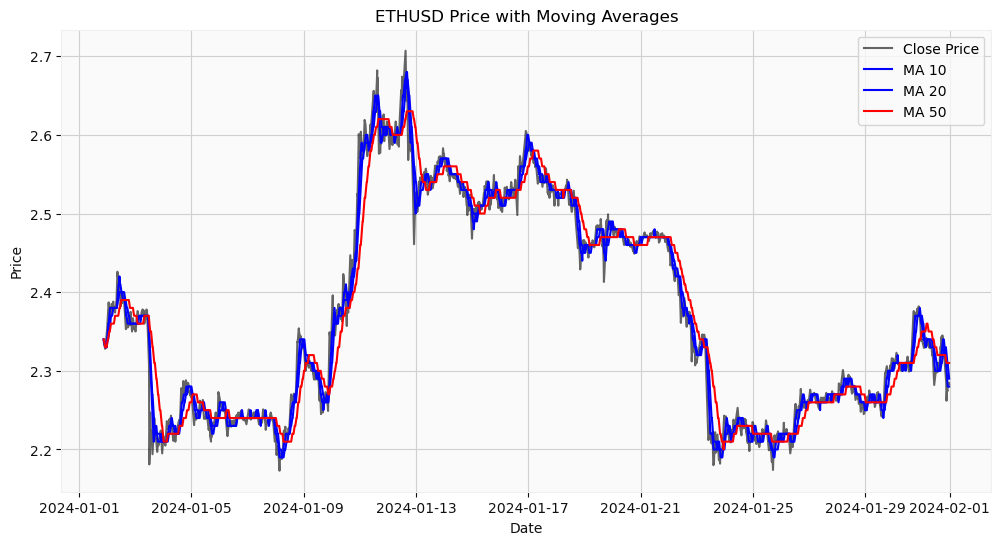

In [49]:
##visualisation for moving average
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(data['Local_time_T'], data['MA_10'], label='MA 10', color='blue')
plt.plot(data['Local_time_T'], data['MA_20'], label='MA 20', color='blue')
plt.plot(data['Local_time_T'], data['MA_50'], label='MA 50', color='red')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ETHUSD Price with Moving Averages")
plt.legend()
plt.show()

In [50]:
#Filter for only January
import pandas as pd 
january_data = data[(data['Local_time_T'].dt.month == 1) & (data['Local_time_T'].dt.year == 2024)]

january_data['MA_10'] = january_data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
january_data['MA_20'] = january_data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
january_data['MA_50'] = january_data['Close_Bid'].rolling(window=50, min_periods=1).mean().round(2)

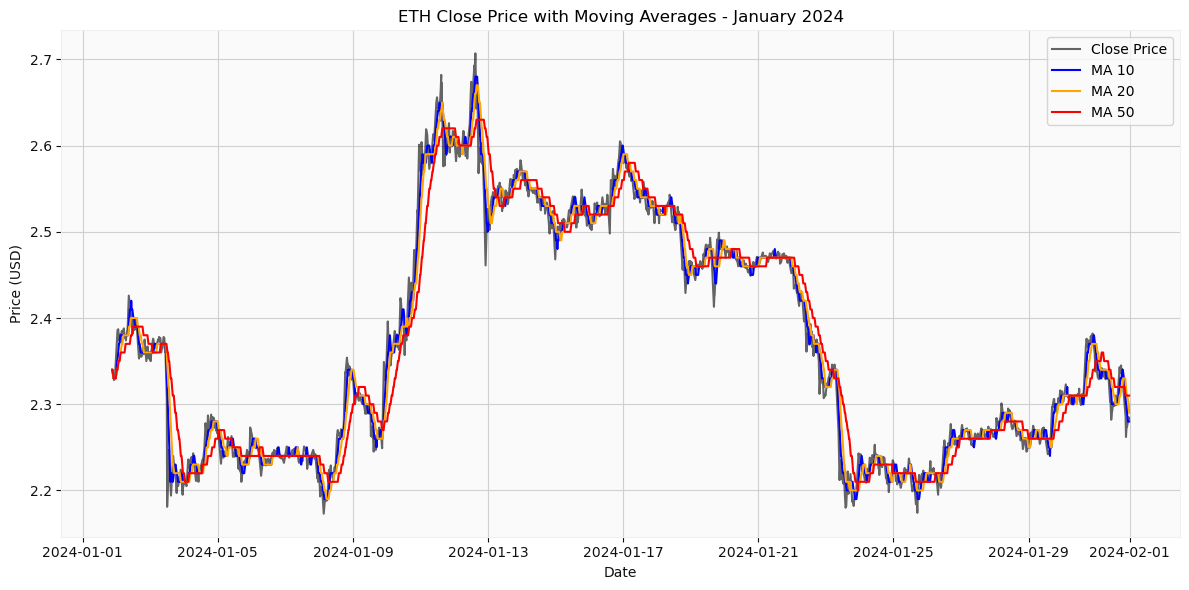

In [51]:
#Visualise
plt.figure(figsize=(12, 6))
plt.plot(january_data['Local_time_T'], january_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(january_data['Local_time_T'], january_data['MA_10'], label='MA 10', color='blue')
plt.plot(january_data['Local_time_T'], january_data['MA_20'], label='MA 20', color='orange')
plt.plot(january_data['Local_time_T'], january_data['MA_50'], label='MA 50', color='red')
plt.title('ETH Close Price with Moving Averages - January 2024')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
#Get the last day
last_day_date = data['Local_time_T'].max().normalize()
one_day_data = data[data['Local_time_T'].dt.normalize() == last_day_date]

one_day_data['MA_10'] = one_day_data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
one_day_data['MA_20'] = one_day_data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
one_day_data['MA_50'] = one_day_data['Close_Bid'].rolling(window=50, min_periods=1).mean().round(2)

C:\Users\Mike\AppData\Local\Temp\ipykernel_13904\2514843219.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['MA_10'] = one_day_data['Close_Bid'].rolling(window=10, min_periods=1).mean().round(2)
C:\Users\Mike\AppData\Local\Temp\ipykernel_13904\2514843219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_day_data['MA_20'] = one_day_data['Close_Bid'].rolling(window=20, min_periods=1).mean().round(2)
C:\Users\Mike\AppData\Local\Temp\ipykernel_13904\2514843219.py:11: SettingWithCopyWarni

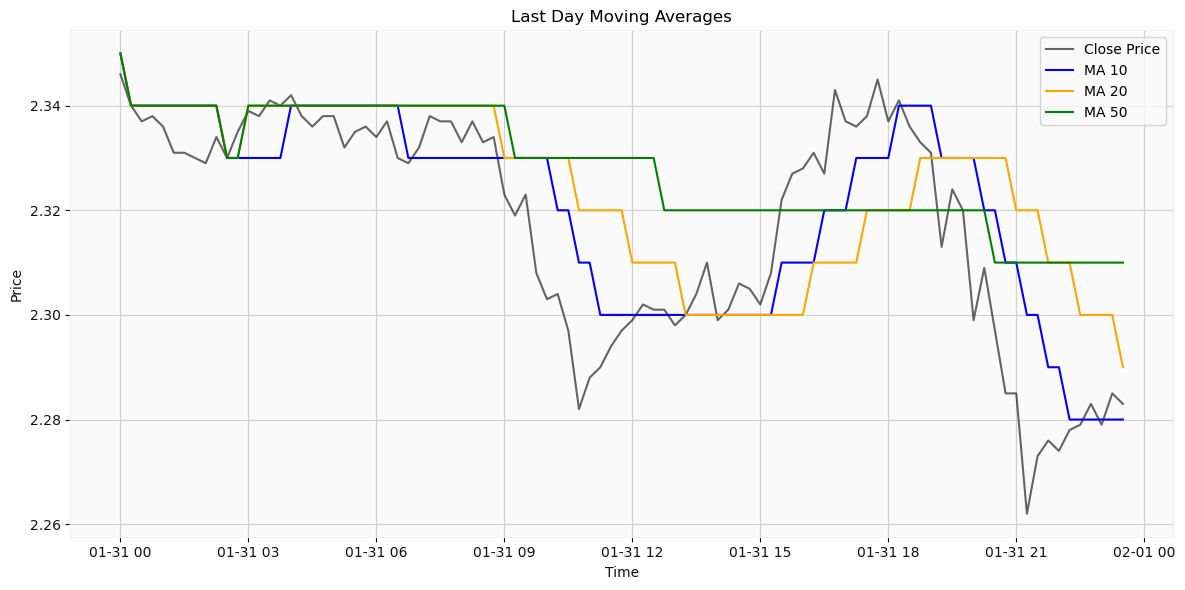

In [53]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(one_day_data['Local_time_T'], one_day_data['Close_Bid'], label='Close Price', color='black', alpha=0.6)
plt.plot(one_day_data['Local_time_T'], one_day_data['MA_10'], label='MA 10', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['MA_20'], label='MA 20', color='orange')
plt.plot(one_day_data['Local_time_T'], one_day_data['MA_50'], label='MA 50', color='green')

plt.title('Last Day Moving Averages')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
#Filter for last day
import pandas as pd
from ta.trend import ADXIndicator
last_day_date = data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day_date.date()]

adx = ADXIndicator(high=one_day_data['High_Bid'],
                   low=one_day_data['Low_Bid'],
                   close=one_day_data['Close_Bid'],
                   window=14)

one_day_data['ADX'] = adx.adx()
one_day_data['+DI'] = adx.adx_pos()
one_day_data['-DI'] = adx.adx_neg()

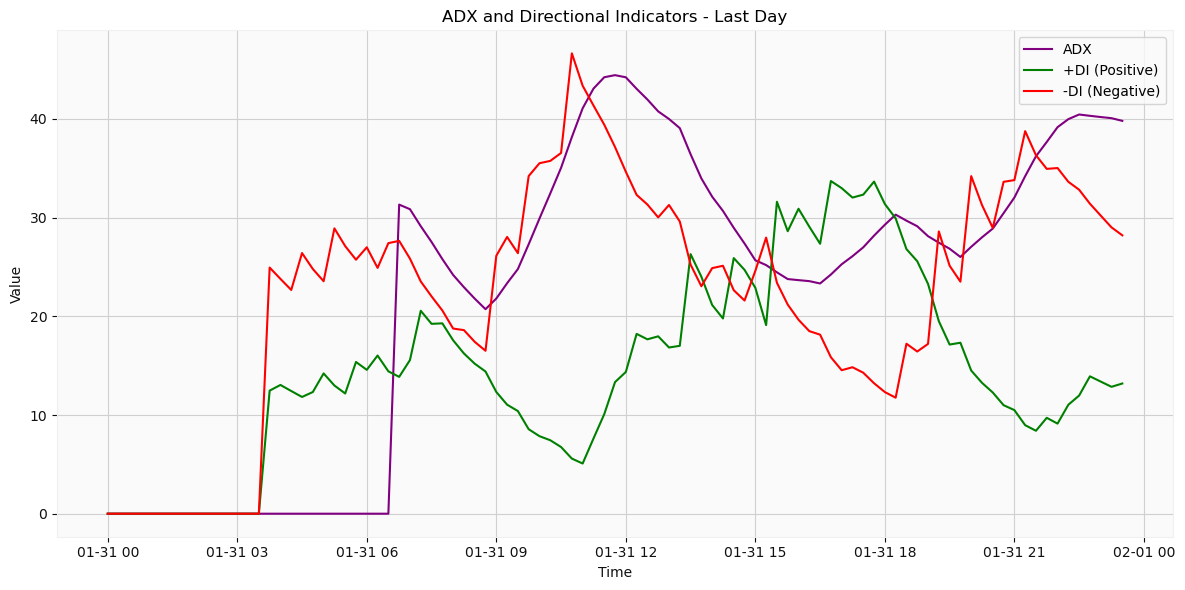

In [55]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(one_day_data['Local_time_T'], one_day_data['ADX'], label='ADX', color='purple')
plt.plot(one_day_data['Local_time_T'], one_day_data['+DI'], label='+DI (Positive)', color='green')
plt.plot(one_day_data['Local_time_T'], one_day_data['-DI'], label='-DI (Negative)', color='red')

plt.title('ADX and Directional Indicators - Last Day')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
#Relative Strength Index (RSI)
delta = data['Close_Bid'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['rsi'] = 100 - (100 / (1 + rs))

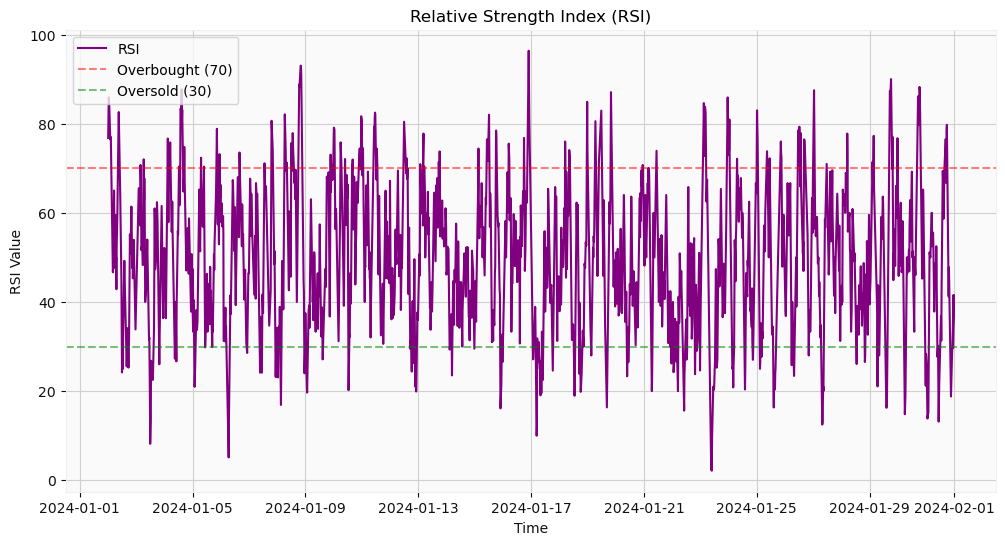

In [57]:
#plot for RSI
plt.figure(figsize=(12, 6))
plt.plot(data['Local_time_T'], data['rsi'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', alpha=0.5, label="Overbought (70)")
plt.axhline(30, linestyle='--', color='green', alpha=0.5, label="Oversold (30)")
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.legend()
plt.show()

In [58]:
#Filter for last day
import pandas as pd
from ta.momentum import RSIIndicator
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

rsi = RSIIndicator(close=one_day_data['Close_Bid'], window=14)
one_day_data['RSI'] = rsi.rsi()

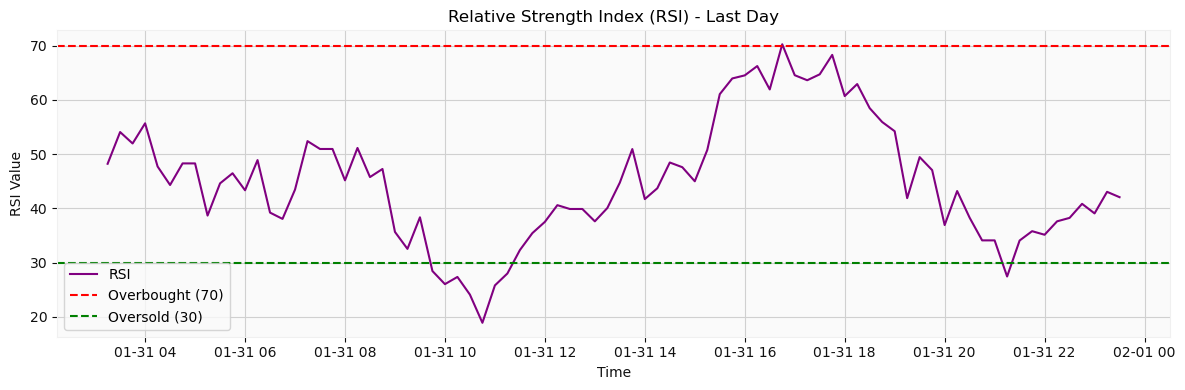

In [59]:
#Visualise
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(one_day_data['Local_time_T'], one_day_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')

plt.title('Relative Strength Index (RSI) - Last Day')
plt.xlabel('Time')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
#Filter for last day
import pandas as pd
from ta.momentum import StochasticOscillator
last_day = one_day_data['Local_time_T'].max().normalize()
one_day_data = one_day_data[one_day_data['Local_time_T'].dt.date == last_day.date()]

stoch = StochasticOscillator(
    high=one_day_data['High_Bid'],
    low=one_day_data['Low_Bid'],
    close=one_day_data['Close_Bid'],
    window=14,
    smooth_window=3
)

one_day_data['%K'] = stoch.stoch()
one_day_data['%D'] = stoch.stoch_signal()


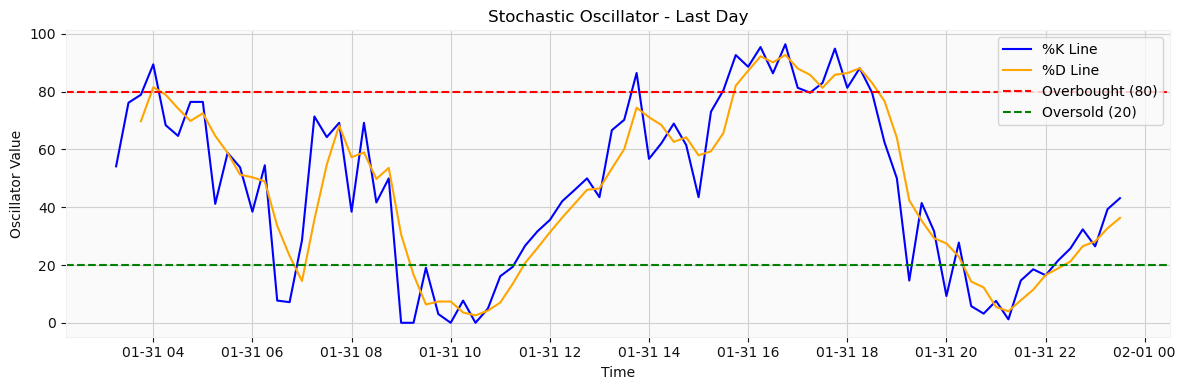

In [61]:
#Filter for last day
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(one_day_data['Local_time_T'], one_day_data['%K'], label='%K Line', color='blue')
plt.plot(one_day_data['Local_time_T'], one_day_data['%D'], label='%D Line', color='orange')
plt.axhline(80, linestyle='--', color='red', label='Overbought (80)')
plt.axhline(20, linestyle='--', color='green', label='Oversold (20)')

plt.title('Stochastic Oscillator - Last Day')
plt.xlabel('Time')
plt.ylabel('Oscillator Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Concatenate, Input, Flatten
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [63]:
#Volume Moving Average
data['vol_ma'] = data['Volume_Bid'].rolling(window=20).mean()

In [64]:
# Volatility percentage
data['Volatility'] = data['Close_Bid'].pct_change().rolling(window=20).std() * np.sqrt(252) * 100

In [65]:
#Define Target
# 1 for Long (bullish), 0 for Short (bearish)
data['Market_Direction'] = np.where(data['bullish_engulfing'] | data['morning_star'] | data['hammer'], 1, 
                                   np.where(data['bearish_engulfing'] | data['evening_star'] | data['shooting_star'], 0, np.nan))
data['Market_Direction'] = data['Market_Direction'].ffill().bfill()

In [66]:
# Drop NaN values
data.dropna(inplace=True)

In [67]:
print(data.shape)

(2870, 41)


In [108]:
##Feature Selection
features = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid',
            'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask',
            'Volume_Delta', 'Volume_Delta_abs', 'Open_Delta', 'High_Delta',
            'Low_Delta', 'Close_Delta',
            'Spread', 'Mid_Price', 'Price_Change', 'Y_High_Bid', 'Y_Low_Ask',
            'Label_Ask', 'Label_Bid', 'bullish_engulfing', 'bearish_engulfing',
            'morning_star', 'evening_star', 'hammer', 'shooting_star',
            'MA_10', 'MA_20', 'MA_50', 'Pct_Change_15min', 'ATR', 'rsi', 'vol_ma',
            'Volatility']

In [110]:
#define X and y
X = data[features]
y = data['Market_Direction']

In [112]:
# Split data
train_size = int(len(data) * 0.8)
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

In [114]:
#Drop non-numeric columns
non_numeric_cols = ['Local time cleaned', 'date', 'Local_time_T']  
X_train = X_train.drop(columns=[col for col in non_numeric_cols if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in non_numeric_cols if col in X_test.columns])

In [116]:
print(X_train.shape)
print(X_test.shape)

(2296, 37)
(574, 37)


In [118]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
#Sequences for time series
def create_sequences(X, y, time_steps=20):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [122]:
time_steps = 20
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, time_steps)

In [124]:
print(X_train_seq.shape)
print(y_train_seq.shape)

(2276, 20, 37)
(2276,)


In [126]:
#Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}

In [128]:
#Earlystopping
#Model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint_cnn = ModelCheckpoint('best_cnn.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_lstm = ModelCheckpoint('best_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_cnn_lstm = ModelCheckpoint('best_cnn_lstm.h5', monitor='val_accuracy', save_best_only=True)
checkpoint_transformer = ModelCheckpoint('best_transformer.h5', monitor='val_accuracy', save_best_only=True)

In [130]:
# Support Vector Machine model
from sklearn.svm import SVC
svm_model = SVC(probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_metrics = evaluate_model(y_test, y_pred_svm, "SVM")

SVM - Accuracy: 0.7892, Precision: 0.8422, Recall: 0.7892, F1-Score: 0.7628


In [132]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_metrics = evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Logistic Regression - Accuracy: 0.7892, Precision: 0.8422, Recall: 0.7892, F1-Score: 0.7628


In [134]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest - Accuracy: 0.7544, Precision: 0.7641, Recall: 0.7544, F1-Score: 0.7343


In [136]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_metrics = evaluate_model(y_test, y_pred_dt, "Decision Tree")

Decision Tree - Accuracy: 0.7282, Precision: 0.7221, Recall: 0.7282, F1-Score: 0.7181


In [138]:
#XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_metrics = evaluate_model(y_test, y_pred_xgb, "XGBoost")

XGBoost - Accuracy: 0.7456, Precision: 0.7446, Recall: 0.7456, F1-Score: 0.7315


In [140]:
#CNN with Keras Tuner
def build_cnn(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [142]:
#Hyperparameter tunning
tuner_cnn = kt.Hyperband(build_cnn, objective='val_accuracy', max_epochs=50, directory='cnn_tuner', project_name='cnn')
tuner_cnn.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn = tuner_cnn.get_best_models(num_models=1)[0]
best_cnn.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
             callbacks=[early_stopping, checkpoint_cnn], verbose=1)
y_pred_cnn = (best_cnn.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_proba = best_cnn.predict(X_test_seq).flatten()
cnn_metrics = evaluate_model(y_test_seq, y_pred_cnn.flatten(), "CNN")

Reloading Tuner from cnn_tuner\cnn\tuner0.json
Epoch 1/50
68/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8174 - loss: 0.3990

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8176 - loss: 0.3987 - val_accuracy: 0.7491 - val_loss: 0.5169
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8367 - loss: 0.3477 - val_accuracy: 0.7058 - val_loss: 0.6130
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8632 - loss: 0.3094 - val_accuracy: 0.7329 - val_loss: 0.5301
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8795 - loss: 0.2716 - val_accuracy: 0.7473 - val_loss: 0.5682
Epoch 5/50
64/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9085 - loss: 0.2296

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9076 - loss: 0.2311 - val_accuracy: 0.7545 - val_loss: 0.5490
Epoch 6/50
65/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9209 - loss: 0.1939

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9204 - loss: 0.1951 - val_accuracy: 0.7581 - val_loss: 0.5503
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN - Accuracy: 0.7491, Precision: 0.7464, Recall: 0.7491, F1-Score: 0.7472


In [144]:
#LSTM with Keras Tuner
def build_lstm(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units', 50, 200, step=50),
                   input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                   return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [146]:
#Hyperparameter tunning
tuner_lstm = kt.Hyperband(build_lstm, objective='val_accuracy', max_epochs=50, directory='lstm_tuner', project_name='lstm')
tuner_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_lstm = tuner_lstm.get_best_models(num_models=1)[0]
best_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
              callbacks=[early_stopping, checkpoint_lstm], verbose=1)
y_pred_lstm = (best_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_lstm_proba = best_lstm.predict(X_test_seq).flatten()
lstm_metrics = evaluate_model(y_test_seq, y_pred_lstm.flatten(), "LSTM")

Reloading Tuner from lstm_tuner\lstm\tuner0.json
Epoch 1/50
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8685 - loss: 0.3060

72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8683 - loss: 0.3065 - val_accuracy: 0.7780 - val_loss: 0.6038
Epoch 2/50
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8830 - loss: 0.2908

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8830 - loss: 0.2909 - val_accuracy: 0.7834 - val_loss: 0.5291
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8717 - loss: 0.3028 - val_accuracy: 0.7726 - val_loss: 0.5911
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9055 - loss: 0.2601 - val_accuracy: 0.7834 - val_loss: 0.6175
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9095 - loss: 0.2230 - val_accuracy: 0.7563 - val_loss: 0.6497
Epoch 6/50
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9129 - loss: 0.2040

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9129 - loss: 0.2041 - val_accuracy: 0.7852 - val_loss: 0.6984
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9341 - loss: 0.1735 - val_accuracy: 0.7653 - val_loss: 0.5910
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
LSTM - Accuracy: 0.7834, Precision: 0.7813, Recall: 0.7834, F1-Score: 0.7788


In [148]:
#CNN-LSTM with Keras Tuner
def build_cnn_lstm(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('filters', 32, 128, step=32),
                     kernel_size=hp.Choice('kernel_size', [3, 5]),
                     activation='relu',
                     input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(hp.Int('lstm_units', 50, 200, step=50), return_sequences=False))
    model.add(Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu'))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [150]:
#Hyperparameter tunning 
tuner_cnn_lstm = kt.Hyperband(build_cnn_lstm, objective='val_accuracy', max_epochs=50, directory='cnn_lstm_tuner', project_name='cnn_lstm')
tuner_cnn_lstm.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_cnn_lstm = tuner_cnn_lstm.get_best_models(num_models=1)[0]
best_cnn_lstm.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                  callbacks=[early_stopping, checkpoint_cnn_lstm], verbose=1)
y_pred_cnn_lstm = (best_cnn_lstm.predict(X_test_seq) > 0.5).astype(int)
y_pred_cnn_lstm_proba = best_cnn_lstm.predict(X_test_seq).flatten()
cnn_lstm_metrics = evaluate_model(y_test_seq, y_pred_cnn_lstm.flatten(), "CNN-LSTM")

Reloading Tuner from cnn_lstm_tuner\cnn_lstm\tuner0.json
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8763 - loss: 0.3117

72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8762 - loss: 0.3120 - val_accuracy: 0.8087 - val_loss: 0.4713
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8861 - loss: 0.3041 - val_accuracy: 0.8087 - val_loss: 0.4730
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8825 - loss: 0.3270 - val_accuracy: 0.7996 - val_loss: 0.5013
Epoch 4/50
66/72 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8940 - loss: 0.2904

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8939 - loss: 0.2894 - val_accuracy: 0.8123 - val_loss: 0.4744
Epoch 5/50
70/72 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8970 - loss: 0.2650

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8969 - loss: 0.2652 - val_accuracy: 0.8141 - val_loss: 0.4947
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8938 - loss: 0.2545 - val_accuracy: 0.8032 - val_loss: 0.4984
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN-LSTM - Accuracy: 0.8087, Precision: 0.8157, Recall: 0.8087, F1-Score: 0.8104


In [152]:
#Vanilla Transformer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)
    ffn = Sequential([
        Dense(ff_dim, activation='relu'),
        Dense(inputs.shape[-1])
    ])
    x = ffn(x)
    x = Dropout(dropout)(x)
    return LayerNormalization(epsilon=1e-6)(x + inputs)

In [154]:
def build_transformer(hp):
    inputs = Input(shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
    x = inputs
    for _ in range(hp.Int('transformer_layers', 1, 3)):
        x = transformer_encoder(x, 
                               head_size=hp.Choice('head_size', [64, 128]),
                               num_heads=hp.Choice('num_heads', [2, 4]),
                               ff_dim=hp.Int('ff_dim', 128, 512, step=128),
                               dropout=hp.Float('dropout', 0.1, 0.5, step=0.1))
    x = Flatten()(x)
    x = Dense(hp.Int('dense_units', 50, 200, step=50), activation='relu')(x)
    x = Dropout(hp.Float('dense_dropout', 0.1, 0.5, step=0.1))(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [156]:
#Hyperparameter tunning
tuner_transformer = kt.Hyperband(build_transformer, objective='val_accuracy', max_epochs=50, directory='transformer_tuner_v2', project_name='transformer')
tuner_transformer.search(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), callbacks=[early_stopping])
best_transformer = tuner_transformer.get_best_models(num_models=1)[0]
best_transformer.fit(X_train_seq, y_train_seq, epochs=50, validation_data=(X_test_seq, y_test_seq), 
                    callbacks=[early_stopping, checkpoint_transformer], verbose=1)
y_pred_transformer = (best_transformer.predict(X_test_seq) > 0.5).astype(int)
y_pred_transformer_proba = best_transformer.predict(X_test_seq).flatten()
transformer_metrics = evaluate_model(y_test_seq, y_pred_transformer.flatten(), "Transformer")

Reloading Tuner from transformer_tuner_v2\transformer\tuner0.json
Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8926 - loss: 0.2409

72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8926 - loss: 0.2409 - val_accuracy: 0.7671 - val_loss: 0.7214
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9125 - loss: 0.2211

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9125 - loss: 0.2212 - val_accuracy: 0.7762 - val_loss: 0.7077
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9114 - loss: 0.2274

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9113 - loss: 0.2274 - val_accuracy: 0.7798 - val_loss: 0.7657
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9210 - loss: 0.1952 - val_accuracy: 0.7617 - val_loss: 0.7604
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9203 - loss: 0.1962 - val_accuracy: 0.7708 - val_loss: 0.8300
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9331 - loss: 0.1667 - val_accuracy: 0.7545 - val_loss: 0.8581
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9357 - loss: 0.1585 - val_accuracy: 0.7599 - val_loss: 0.8645
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Transformer - Accuracy: 0.7762, Precision: 0.7736, Recall: 0.7762, F1-Score: 0.7738


In [158]:
#save best model
best_model = tuner_lstm.get_best_models(num_models=1)[0]

In [160]:
print(best_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       190,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,601 (822.66 KB)

 Trainable params: 210,601 (822.66 KB)

 Non-trainable params: 0 (0.00 B)

None


In [162]:
#Trailing Stop Simulation and Backtesting
def backtest_trailing_stop(df, model, scaler, features, threshold=0.5, stop_loss_pct=0.02, take_profit_pct=0.05):
    capital = 10000
    position = 0
    entry_price = 0
    trade_history = []
    df['trailing_stop'] = np.nan
    df['position'] = 0
    df['predicted_proba'] = np.nan

    for i in range(time_steps, len(df)):
        seq = df[features].iloc[i-time_steps:i].values
        seq_scaled = scaler.transform(seq)
        seq_scaled = seq_scaled.reshape(1, time_steps, len(features))
        
        if isinstance(model, (xgb.XGBClassifier, DecisionTreeClassifier)):
            pred_proba = model.predict_proba(seq_scaled[:, -1, :])[0][1]
        else:
            pred_proba = model.predict(seq_scaled, verbose=0)[0][0]
        
        df.loc[df.index[i], 'predicted_proba'] = pred_proba

        if pred_proba > threshold and position == 0:
            if df['bullish_engulfing'].iloc[i] == 1:
                position = capital / df['Close_Bid'].iloc[i]
                entry_price = df['Close_Bid'].iloc[i]
                stop_loss = entry_price * (1 - stop_loss_pct)
                trade_history.append({'entry': entry_price, 'stop_loss': stop_loss, 'profit': 0})
                df.loc[df.index[i], 'position'] = 1

        if position > 0:
            highest_price = df['High_Bid'].iloc[i-time_steps:i+1].max()
            df.loc[df.index[i], 'trailing_stop'] = max(df['trailing_stop'].iloc[i-1] if i > 0 else stop_loss, 
                                                      highest_price * (1 - stop_loss_pct))
            
            if df['Close_Bid'].iloc[i] <= df['trailing_stop'].iloc[i] or df['Close_Bid'].iloc[i] >= entry_price * (1 + take_profit_pct):
                exit_price = df['Close_Bid'].iloc[i]
                profit = (exit_price - entry_price) * position
                capital += profit
                trade_history[-1]['profit'] = profit
                trade_history.append({'entry': entry_price, 'exit': exit_price, 'profit': profit})
                print(f"Exit Long at {exit_price} on {df['Local_time_T'].iloc[i]} with PnL: {profit:.2f}")
                position = 0
                df.loc[df.index[i], 'position'] = 0

    total_profit = sum(trade['profit'] for trade in trade_history if 'profit' in trade)
    print(f"\nTotal Profit from Backtest: {total_profit:.2f} USD")
    return df, trade_history, capital

In [164]:
#Run backtest with best model 
data, trade_history, final_capital = backtest_trailing_stop(data, best_lstm, scaler, features)

Exit Long at 2.319 on 2024-01-08 18:15:00+00:00 with PnL: 512.24
Exit Long at 2.413 on 2024-01-10 09:15:00+00:00 with PnL: 540.50

Total Profit from Backtest: 2105.48 USD


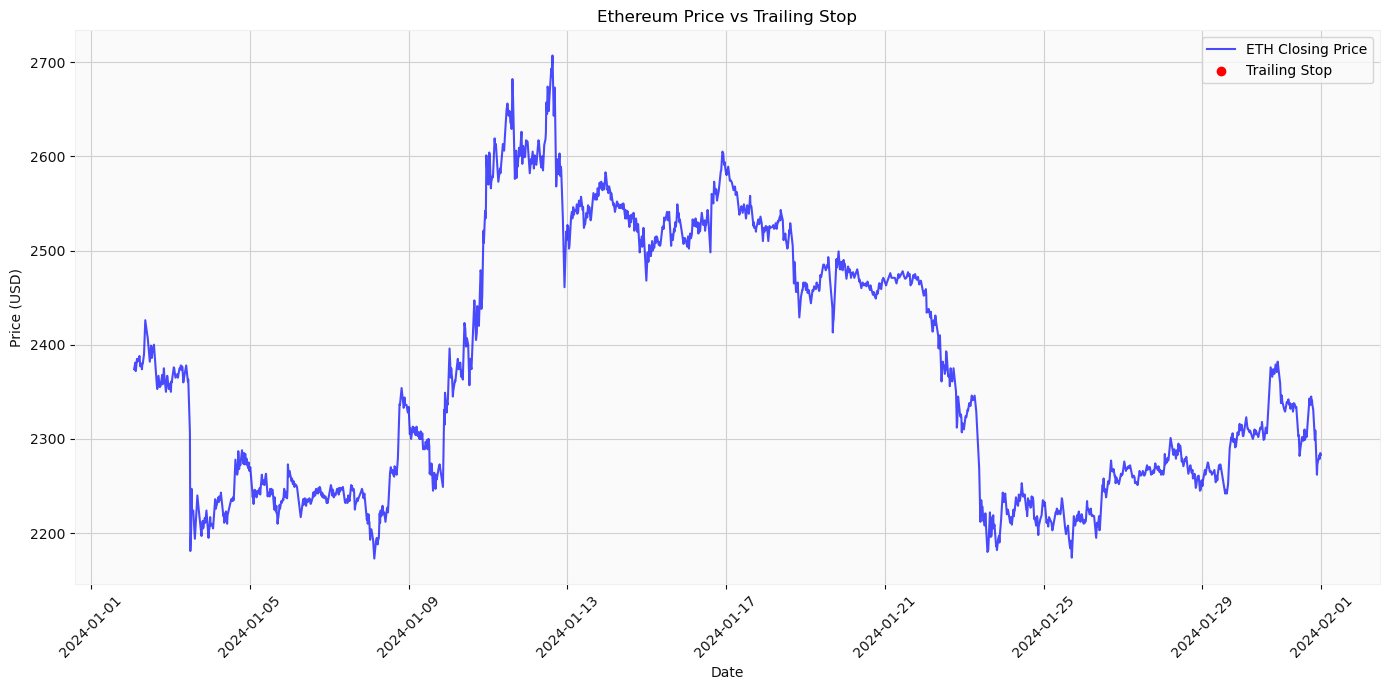

In [166]:
#Visualization for trailing stop
def visualize_trailing_stop(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['Local_time_T'], df['Close_Bid'] * 1000, label='ETH Closing Price', color='blue', alpha=0.7)
    trailing_stop_points = df[df['trailing_stop'].notnull()]
    plt.scatter(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
                color='red', label='Trailing Stop', zorder=5)
    plt.plot(trailing_stop_points['Local_time_T'], trailing_stop_points['trailing_stop'] * 1000, 
             color='red', linestyle='--', alpha=0.8)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.title('Ethereum Price vs Trailing Stop')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_trailing_stop(data)

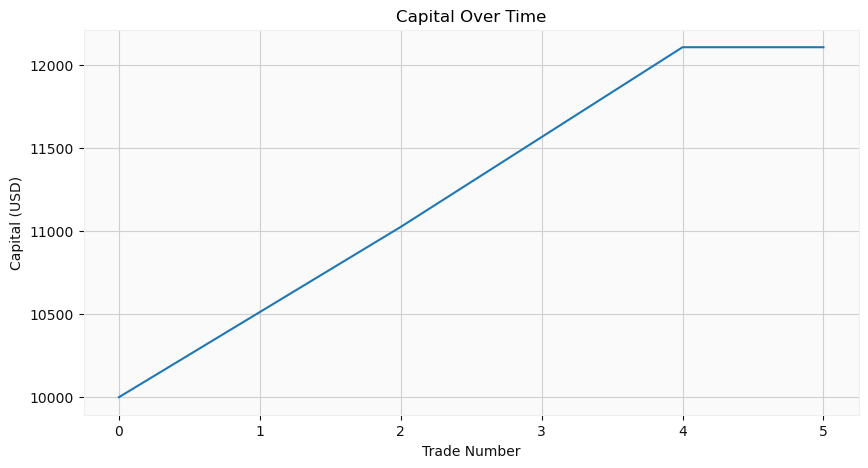

In [168]:
# Capital Over Time
capital_history = [10000]
for trade in trade_history:
    if 'profit' in trade:
        capital_history.append(capital_history[-1] + trade['profit'])

plt.figure(figsize=(10, 5))
plt.plot(capital_history)
plt.title('Capital Over Time')
plt.xlabel('Trade Number')
plt.ylabel('Capital (USD)')
plt.show()

In [170]:
#Print Predicted Probabilities
print("Predicted Probabilities:")
print(data[['Local_time_T', 'predicted_proba']].tail(10))

Predicted Probabilities:
                  Local_time_T  predicted_proba
2880 2024-01-31 21:15:00+00:00         0.940272
2881 2024-01-31 21:30:00+00:00         0.997238
2882 2024-01-31 21:45:00+00:00         0.984205
2883 2024-01-31 22:00:00+00:00         0.650434
2884 2024-01-31 22:15:00+00:00         0.936445
2885 2024-01-31 22:30:00+00:00         0.869086
2886 2024-01-31 22:45:00+00:00         0.965932
2887 2024-01-31 23:00:00+00:00         0.218283
2888 2024-01-31 23:15:00+00:00         0.909984
2889 2024-01-31 23:30:00+00:00         0.276555


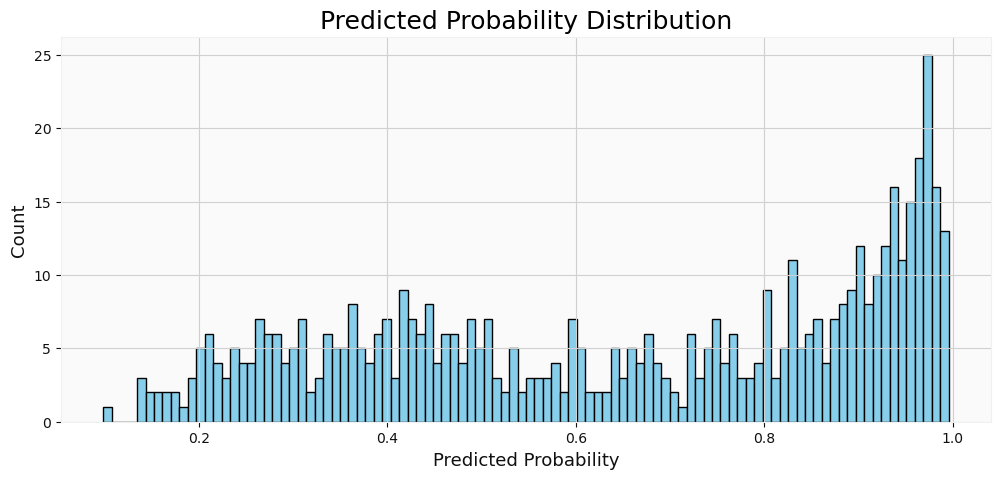

In [172]:
#Visualise predicted probability
import matplotlib.pyplot as plt

plt.figure(num=1, figsize=(12, 5))
plt.hist(y_pred_cnn_proba, bins=100, color='skyblue', edgecolor='black')
plt.title('Predicted Probability Distribution', size=18)
plt.xlabel('Predicted Probability', size=13)
plt.ylabel('Count', size=13)
plt.grid(True)
plt.show()

In [174]:
#Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.68      0.51      0.58       214
         1.0       0.75      0.86      0.80       360

    accuracy                           0.73       574
   macro avg       0.71      0.68      0.69       574
weighted avg       0.72      0.73      0.72       574



In [176]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.74      0.49      0.59       214
         1.0       0.75      0.90      0.82       360

    accuracy                           0.75       574
   macro avg       0.74      0.69      0.70       574
weighted avg       0.74      0.75      0.73       574



In [178]:
print(classification_report(y_test_seq, y_pred_cnn.flatten()))

              precision    recall  f1-score   support

         0.0       0.69      0.64      0.66       212
         1.0       0.78      0.82      0.80       342

    accuracy                           0.75       554
   macro avg       0.73      0.73      0.73       554
weighted avg       0.75      0.75      0.75       554



In [180]:
print(classification_report(y_test_seq, y_pred_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       212
         1.0       0.79      0.88      0.83       342

    accuracy                           0.78       554
   macro avg       0.78      0.75      0.76       554
weighted avg       0.78      0.78      0.78       554



In [182]:
print(classification_report(y_test_seq, y_pred_cnn_lstm.flatten()))

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       212
         1.0       0.87      0.81      0.84       342

    accuracy                           0.81       554
   macro avg       0.80      0.81      0.80       554
weighted avg       0.82      0.81      0.81       554



In [184]:
print(classification_report(y_test_seq, y_pred_transformer.flatten()))

              precision    recall  f1-score   support

         0.0       0.73      0.66      0.69       212
         1.0       0.80      0.85      0.82       342

    accuracy                           0.78       554
   macro avg       0.77      0.75      0.76       554
weighted avg       0.77      0.78      0.77       554

